<a href="https://colab.research.google.com/github/Greekmy/python/blob/main/numpyvector_broadcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

a = np.array([10, 20, 30, 40])
a + 5

array([15, 25, 35, 45])

In [2]:
b = np.array([5])
a + b

array([15, 25, 35, 45])

In [3]:
b = np.array([5, 5, 10, 10])
a + b

array([15, 25, 40, 50])

In [4]:
b = np.array([1, 2, 3, 4, 5])


In [5]:
result = np.empty((5, 4), dtype=np.int32)
for row, valb in enumerate(b):
    for col, vala in enumerate(a):
        result[row, col] = vala + valb
result

array([[11, 21, 31, 41],
       [12, 22, 32, 42],
       [13, 23, 33, 43],
       [14, 24, 34, 44],
       [15, 25, 35, 45]], dtype=int32)

In [6]:
aa = np.tile(a, (5, 1))
aa

array([[10, 20, 30, 40],
       [10, 20, 30, 40],
       [10, 20, 30, 40],
       [10, 20, 30, 40],
       [10, 20, 30, 40]])

In [7]:
# Turn b into a column array, then tile it
bb = np.tile(b.reshape(5, 1), (1, 4))
bb

array([[1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3],
       [4, 4, 4, 4],
       [5, 5, 5, 5]])

In [8]:
aa + bb


array([[11, 21, 31, 41],
       [12, 22, 32, 42],
       [13, 23, 33, 43],
       [14, 24, 34, 44],
       [15, 25, 35, 45]])

In [9]:
a.shape
b.shape


(5,)

In [10]:
bb = b[:, np.newaxis]
bb.shape

(5, 1)

In [11]:
a + bb
x = np.array([1, 2])
y = np.array([3, 4, 5])
z = np.array([6, 7, 8, 9])

In [14]:
d_2d = x[:, np.newaxis]**2 + y**2
d_2d
d_2d.shape



(2, 3)

In [16]:
d_3d = d_2d[..., np.newaxis] + z**2
d_3d.shape



(2, 3, 4)

In [17]:
h = x[:, np.newaxis, np.newaxis]**2 + y[np.newaxis, :, np.newaxis]**2 + z**2


In [18]:
h.shape
np.all(h == d_3d)


True

In [19]:
pressure = np.array([1000, 850, 500, 300])
temps = np.linspace(20, 30, 24).reshape(4, 3, 2)

In [20]:
# Create an array for testing
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [21]:
np.sum(a)
a.shape
np.sum(a, axis=0)
np.sum(a, axis=1)


array([ 6, 22, 38])

In [23]:
temp = np.random.randn(100, 50)
u = np.random.randn(100, 50)
v = np.random.randn(100, 50)
# Calculate the gradient components
gradx, grady = np.gradient(temp)

# Turn into an array of vectors:
# axis 0 is x position
# axis 1 is y position
# axis 2 is the vector components
grad_vec = np.dstack([gradx, grady])
print(grad_vec.shape)

# Turn wind components into vector
wind_vec = np.dstack([u, v])
advec = (wind_vec * -grad_vec).sum(axis=-1)
print(advec.shape)

(100, 50, 2)
(100, 50)


In [24]:
# Create some synthetic data representing temperature and wind speed data
np.random.seed(19990503)  # Make sure we all have the same data
temp = (20 * np.cos(np.linspace(0, 2 * np.pi, 100)) +
        50 + 2 * np.random.randn(100))
spd = (np.abs(10 * np.sin(np.linspace(0, 2 * np.pi, 100)) +
              10 + 5 * np.random.randn(100)))

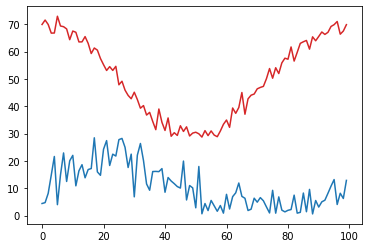

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(temp, 'tab:red')
plt.plot(spd, 'tab:blue');

[69.89825854 71.52313905 69.90028363 66.73828667 66.77980233 72.91468564
 69.34603239 69.09533591 68.27350814 64.33916721 67.49497791 67.05282372
 63.51829518 63.54034678 65.46576463 62.99683836 59.27662304 61.29361272
 60.51641586 57.46048995 55.19793004 53.07572989 54.47998158 53.09552107
 54.59037269 47.84272747 49.1435589  45.87151534 45.11976794 45.009292
 46.36021141 46.87557425 47.25668992 50.09599544 53.77789358 50.24073197
 54.07629059 51.95065202 55.84827794 57.56967086 57.19572063 61.67658285
 56.51474577 59.72166924 62.99403256 63.57569453 64.05984232 60.88258643
 65.37759899 63.94115754 65.53070256 67.15175649 66.26468701 67.03811793
 69.17773618 69.83571708 70.99586742 66.34971928 67.49905207 69.83593609]
[66.73828667 66.77980233 69.34603239 69.09533591 68.27350814 64.33916721
 67.49497791 67.05282372 63.51829518 63.54034678 65.46576463 62.99683836
 59.27662304 61.29361272 60.51641586 57.46048995 55.19793004 53.07572989
 54.47998158 53.09552107 54.59037269 47.84272747 49.

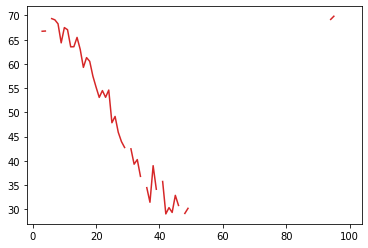

In [28]:
temp > 45
print(temp[temp > 45])
print(temp[spd > 10])
# Make a copy so we don't modify the original data
temp2 = temp.copy()

# Replace all places where spd is <10 with NaN (not a number) so matplotlib skips it
temp2[spd < 10] = np.nan
plt.plot(temp2, 'tab:red')
print(temp[(temp < 45) & (spd > 10)])


[ 99.89825854 101.52313905  99.90028363  96.73828667  96.77980233
 102.91468564  99.34603239  99.09533591  98.27350814  94.33916721
  97.49497791  97.05282372  93.51829518  93.54034678  95.46576463
  92.99683836  89.27662304  91.29361272  90.51641586  87.46048995
  85.19793004  83.07572989  84.47998158  83.09552107  84.59037269
  80.09599544  83.77789358  80.24073197  84.07629059  81.95065202
  85.84827794  87.56967086  87.19572063  91.67658285  86.51474577
  89.72166924  92.99403256  93.57569453  94.05984232  90.88258643
  95.37759899  93.94115754  95.53070256  97.15175649  96.26468701
  97.03811793  99.17773618  99.83571708 100.99586742  96.34971928
  97.49905207  99.83593609]


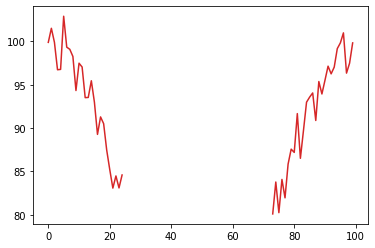

In [29]:
import numpy as np

# Here's the "data"
np.random.seed(19990503)  # Make sure we all have the same data
temp = (20 * np.cos(np.linspace(0, 2 * np.pi, 100)) +
        80 + 2 * np.random.randn(100))
rh = (np.abs(20 * np.cos(np.linspace(0, 4 * np.pi, 100)) +
              50 + 5 * np.random.randn(100)))

# Create a mask for the two conditions described above
good_heat_index = (temp >= 80) & (rh >= 0.4)

# Use this mask to grab the temperature and relative humidity values that together
# will give good heat index values
print(temp[good_heat_index]) 

# BONUS POINTS: Plot only the data where heat index is defined by
# inverting the mask (using ~mask) and setting invalid values to np.nan
temp[~good_heat_index] = np.nan
plt.plot(temp, 'tab:red')

NumPy Broadcasting and Vectorization


In [30]:
import numpy as np

a = np.array([10, 20, 30, 40])
a + 5

array([15, 25, 35, 45])

In [31]:
b = np.array([5])
a + b

array([15, 25, 35, 45])

In [32]:
b = np.array([5, 5, 10, 10])
a + b

array([15, 25, 40, 50])

In [33]:
b = np.array([1, 2, 3, 4, 5])


In [35]:
pressure = np.array([1000, 850, 500, 300])
temps = np.linspace(20, 30, 24).reshape(4, 3, 2)

temps * np.exp(pressure[:, np.newaxis, np.newaxis] / 1000)

array([[[54.36563657, 55.54749823],
        [56.7293599 , 57.91122156],
        [59.09308323, 60.27494489]],

       [[52.89636361, 53.91360137],
        [54.93083913, 55.94807689],
        [56.96531466, 57.98255242]],

       [[41.57644944, 42.29328477],
        [43.01012011, 43.72695544],
        [44.44379078, 45.16062611]],

       [[37.56128856, 38.14818369],
        [38.73507883, 39.32197396],
        [39.90886909, 40.49576423]]])

In [36]:
a = np.linspace(0, 20, 6)
a

array([ 0.,  4.,  8., 12., 16., 20.])

In [37]:
d = np.zeros(a.size - 1)
for i in range(len(a) - 1):
    d[i] = a[i + 1] - a[i]
d

array([4., 4., 4., 4., 4.])

In [38]:
a[1:]


array([ 4.,  8., 12., 16., 20.])

In [39]:
a[:-1]


array([ 0.,  4.,  8., 12., 16.])

In [40]:
a[1:] - a[:-1]


array([4., 4., 4., 4., 4.])

In [ ]:
2 * a[1:-1] - a[:-2] - a[2:]

In [41]:
temps = np.round(20 + np.random.randn(10) * 5, 1)
temps

array([15.6, 21.9, 21.9, 25.1, 15.8, 24.4, 19.3, 33.6, 16.3, 16. ])

Writing a loop to take a 3-point running mean of the data. This can be done by iterating over all the point in the array and average the 3 points centered on that point.

In [42]:
avg = np.zeros_like(temps)
# We're just ignoring the edge effects here
for i in range(1, len(temps) - 1):
    sub = temps[i - 1:i + 2]
    avg[i] = sub.mean()

In [43]:
avg


array([ 0.        , 19.8       , 22.96666667, 20.93333333, 21.76666667,
       19.83333333, 25.76666667, 23.06666667, 21.96666667,  0.        ])

In [44]:
# i - 1            i          i + 1
(temps[:-2] + temps[1:-1] + temps[2:]) / 3

array([19.8       , 22.96666667, 20.93333333, 21.76666667, 19.83333333,
       25.76666667, 23.06666667, 21.96666667])

In [45]:
temp

array([ 99.89825854, 101.52313905,  99.90028363,  96.73828667,
        96.77980233, 102.91468564,  99.34603239,  99.09533591,
        98.27350814,  94.33916721,  97.49497791,  97.05282372,
        93.51829518,  93.54034678,  95.46576463,  92.99683836,
        89.27662304,  91.29361272,  90.51641586,  87.46048995,
        85.19793004,  83.07572989,  84.47998158,  83.09552107,
        84.59037269,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,       

In [46]:
block_size = 3
new_shape = (len(temps) - block_size + 1, block_size)
bytes_per_item = temps.dtype.itemsize
temps_strided = np.lib.stride_tricks.as_strided(temps,
                                                shape=new_shape,
                                                strides=(bytes_per_item, bytes_per_item))
temps_strided

array([[15.6, 21.9, 21.9],
       [21.9, 21.9, 25.1],
       [21.9, 25.1, 15.8],
       [25.1, 15.8, 24.4],
       [15.8, 24.4, 19.3],
       [24.4, 19.3, 33.6],
       [19.3, 33.6, 16.3],
       [33.6, 16.3, 16. ]])

In [47]:
temps_strided.mean(axis=-1)


array([19.8       , 22.96666667, 20.93333333, 21.76666667, 19.83333333,
       25.76666667, 23.06666667, 21.96666667])

In [48]:
temps_strided[0, 2] = 2000
temps_strided

array([[  15.6,   21.9, 2000. ],
       [  21.9, 2000. ,   25.1],
       [2000. ,   25.1,   15.8],
       [  25.1,   15.8,   24.4],
       [  15.8,   24.4,   19.3],
       [  24.4,   19.3,   33.6],
       [  19.3,   33.6,   16.3],
       [  33.6,   16.3,   16. ]])

In [49]:
pressure = np.linspace(1000, 100, 25)
temps = np.random.randn(25, 30, 40) * 3 + np.linspace(25, -100, 25).reshape(-1, 1, 1)

In [50]:
# Using axis=0 to tell it to operate along the pressure dimension
inds = np.argmin(np.abs(temps - -10), axis=0)
inds

array([[7, 7, 7, ..., 6, 7, 6],
       [7, 7, 6, ..., 7, 7, 8],
       [7, 6, 6, ..., 7, 7, 6],
       ...,
       [7, 7, 6, ..., 7, 7, 6],
       [7, 6, 6, ..., 7, 6, 7],
       [6, 7, 6, ..., 6, 7, 8]])

In [51]:
inds.shape


(30, 40)

In [52]:
pressure[inds]


array([[737.5, 737.5, 737.5, ..., 775. , 737.5, 775. ],
       [737.5, 737.5, 775. , ..., 737.5, 737.5, 700. ],
       [737.5, 775. , 775. , ..., 737.5, 737.5, 775. ],
       ...,
       [737.5, 737.5, 775. , ..., 737.5, 737.5, 775. ],
       [737.5, 775. , 775. , ..., 737.5, 775. , 737.5],
       [775. , 737.5, 775. , ..., 775. , 737.5, 700. ]])

In [53]:
temps[inds, :, :].shape


(30, 40, 30, 40)

In [54]:
output = np.empty(inds.shape, dtype=temps.dtype)
for (i, j), val in np.ndenumerate(inds):
    output[i, j] = temps[val, i, j]
output

array([[-10.14693646, -10.73922008,  -8.49191364, ...,  -7.82265214,
         -8.41637367,  -6.88225779],
       [-10.55002029, -11.13020168, -11.85619705, ..., -12.50716902,
         -5.99655968,  -8.07955017],
       [-10.65435837,  -9.65969127,  -7.61868718, ..., -11.14021744,
        -11.84803029, -10.82548735],
       ...,
       [-12.97976772,  -9.60382426,  -6.9769041 , ...,  -8.03130626,
        -11.48106798,  -6.66645564],
       [-12.85427148,  -7.2384984 , -10.30220474, ...,  -9.69642952,
         -9.58706164, -10.30930626],
       [ -9.79276561,  -9.10536582, -10.87467489, ...,  -9.15323379,
        -10.1780127 , -10.73320067]])

In [56]:
pressure[np.arange(pressure.size)]
np.all(pressure[np.arange(pressure.size)] == pressure)
y_inds = np.arange(temps.shape[1])[:, np.newaxis]
x_inds = np.arange(temps.shape[2])
temps[inds, y_inds, x_inds]
np.all(output == temps[inds, y_inds, x_inds])


True

https://numpy.org/doc/stable/user/basics.broadcasting.html